# Simulated Annealing
Simulated Annealing uses the process of cooling of a substance that leads to the a stronger molecular structure. The heuristic algorithm uses two parameters:

1. Temperature, $T$: "temperature" which is dropped in a very controlled fashion.
2. Rate, $\alpha$: the rate of cooling

## Simulated Annealing (SA) vs. Greedy Stochastic (GS)
In GS, the value of $s$ only moves if a better one is found. Therefore, "uphill" moves (which lead to increase in cost) are strictly prohibited.

In SA however, we have:
  * For downhill move: go downhill
  * For uphill move: with probability $p$, go uphill, otherwise stay
  
Therefore, the important distinction between greedy search and simulated annealing is that **sometimes you will accept an uphill move**. The probability of accepting such an uphill movement should depend on:
 * The size of the uphill move
 * The number of iterations in the search that have already been performed
 * A random variable
 
The probability $p$ is therefore set as follows:
$$p = \exp(\frac{-\Delta Cost}{T\cdot \alpha}) $$
where $\Delta Cost = Cost(s_{new}) - Cost(s_{current})$. $\Delta Cost>0$ corresponds to an uphill move. The larger the value of $\Delta Cost$, the larger the uphill move and the smaller the probability $p$ of performing the uphill move. Also, the larger the temperature $T$, the larger the probability $p$. Typically, $\alpha = 1$.
 
## Steps of Simulated Annealing Algorithm
0. **Initialization**: Select the initial guess $s_0$ as the solution. Set the initial temperature $T_0$, and other algorithm parameters including $\alpha, M, \beta, $ `max_time`. The temperature is changed at every $M$ evaluations, and $M$ changes with time as $M=\beta M$. We have $0<\alpha<1$. Set $s_{curr} = s_0, t=1, s_{best}=s_0$
1. **Metropolis Step**:
  * Select at random $s_{new}\in neigh(s_{curr})$
  * If $Cost(s_{new})<Cost(s_{curr})$ then replace $s_{curr}$ by $s_{new}$.
  * If $Cost(s_{new})\geq Cost(s_{curr})$ then with probability $p$, replace $s_{curr}$ by $s_{new}$
  * $M = M-1$. If $M=0$, goto Step 2. Else, repeat step 1.
2. If $Cost(s_{curr})<Cost(s_{best})$, replace $s_{best}$ with $s_{curr}$. Let $T= \alpha T$, $M = \beta M$ and $t=t+1$. If $t\leq$ `max_time`, goto step 1. Otherwise stop. Note that since $\alpha < 1$, the temperature will decrease with time.

## Selecting algorithm parameters: $T_0, \alpha, \beta, M, $ `max_time`
The principle is that initially you want to accept a relatively high percentage of uphill moves (for a minimization problem), but the more iterations you have done, the less you want to accept uphill moves.

Assuming $M=1$, the value of the temperature at iteration $i: T_i = \alpha^iT_0$. Let $p_1$ be the goal for average probability of accepting an uphill move initially and $p_2$ be the goal for teh probability of accepting an uphill movement after $GM$ iterations. We have the total number of evaluations as: $Total Evals = AP + GM + E = AP + $ `max_iter`. Here, 
* $AP$ is the number of evaluations for picking algorithm parameters
* $GM$ is the number of evaluations of SA where prob of uphill move is $> p_2$.
* $E$ is the number of iterations after $GM$ for which the SA algorithm acts very similarly to greedy search ($p$ is very low)

### Calculating $T_0$
Given that you can estimate the range of the cost of uphil movements, $R = \max Cost(s) - \min Cost(s)$, and the average value of $\Delta Cost$, then:
$$p_1 = \exp (\frac{-\Delta Cost}{T_0})$$
$$\Rightarrow T_0 = -\frac{\Delta Cost_{avg}}{\ln p_1}$$

### Calculating $\alpha$
The probability $p_k$ in the $k$-th iteration is $p_k = \exp \frac{-\Delta Cost}{T_k}$. We also have $T_k = T_{k-1}\alpha = \ldots = T_0\alpha^k$. Therefore, we have the value for $p_2$ at iteration $G$:
$$\Rightarrow p_2 = \exp (-\frac{\Delta Cost_{avg}}{\alpha^G T_0})$$
Since we already calculated $T_0$, we can calculate $\alpha$ as:
$$\Rightarrow \alpha = (-\frac{\Delta Cost_{avg}}{T_0 \ln p_2})^{1/G}$$
Substituting the value for $T_0$ we get:
$$\Rightarrow \alpha = [\frac{\ln p_1}{\ln p_2}]^{1/G}$$

Note that $T_0$ depends on $\Delta Cost_{avg}$, but not $\alpha$. For $M\neq 1$, assume that the number of iteratoins until $p_2$ that we want is $GM$ iterations and not just $G$ iterations. Everything else then remians the same.

### Calculating $\Delta Cost_{avg}$
**Method 1: No evaluations for estimation**
* Let’s assume you can make a guess of the minimum Cost (`minCost`) value and the maximum cost (`MaxCost`).
* Unless you have better information, assume the Cost values are uniformly distributed between the `minCost` and `maxCost` and that the value of $Cost(s_0)$ is the average of `minCost` and `maxCost`.
* With this approach, we estimate $\Delta Cost_{avg} = $ `minCost` $+0.75\times ($ `maxCost`$-$ `minCost` $)$

**Method 2: Uses AP evaluations to get better estimate**
This method still only provides an approximation, but it can help get a $T_0$ that is probably in the right order of magnitude. This method also provides aa good value for the initial $s_0$.
* Pick an $s_1$ and evaluate $Cost(s_m)$ for AP selected points $s_m \in N(s_1), \forall m=1,\ldots,AP$ (User chooses how large is AP and guesses that $s_1$ might be a good point for minimum.
* Pick the value of $s_m \in N(s_1)$ for which $Cost(s_m)$ is smallest and select that as the initial point $s_0$.
* Then the estimate of $\Delta Cost_{avg}$ is $\frac{1}{c}\sum_{j=1}^c (Cost(s_j)-Cost(s_0))$ where $s_j$ are the elements in $N(s_1)$ that are uphill for $s_0, \forall j=1, \ldots, c$.

Neither of the methods is guaranteed to give the best value of $T_0$. However, method 2 requires more calculation. Therefore the method should be decided based on the amount of pre-existing information, how expensive it is to compute cost function and the max number of allowed evaluations of cost function.

### Advantage / Disadvantage of large $AP$
**Disadvantages:**
* AP reduces number of optimization runs and Method 2 takes extra programming to set up.
* The methods we have suggested look at $\Delta Cost_{avg}$ around a neighborhood of $s_0$, but as the search progresses you will be in (unpredictably) different neighborhoods where $\Delta Cost_{avg}$ could be quite different, which reduces the benefits of searching for a really good $T_0$ and $\alpha$.
* There is no way to determine exactly what impact a better $T_0$ and $\alpha$ will have on the outcome so having a really large AP to get an excellent estimate of $T_0$ and $\alpha$ , probably is not worth the computing effort.

**Advantages:**
* Having a more accurate $\Delta Cost_{avg}$ estimate to get $T_0$ and $\alpha$ has a good chance to improve the ccuracy of the answer.
* As a rule of thumb,$AP<\delta $ `maxiter`, where $\delta$ is something like $0.05$.

## Python example
Minimize $f(s) = 10^9-(625-(s_1-25)^2) \cdot (1600-(s_2-10)^2)\sin (s_1\pi/10) \cdot \sin(s_2\pi/10))$
$\forall s= [s_1, s_2], 0\leq s_1, s_2\leq 127, \{s_1, s_2\}\in\mathbb{N}$

The neighborhood function randomly perturns one of $s_1$ or $s_2$ between `max(s-25, 0)` and `min(s+25, 127)`. It shhould not select itself as a neighbor.

In [1]:
import numpy as np
from math import sin, cos, pi, exp, log
from random import randint, random
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
def pretty_plot(xlim=None, ylim=None, xlabel=None, ylabel=None, title=None, colorbar=False):
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)
    if xlabel is not None:
        plt.xlabel(xlabel)
    if ylabel is not None:
        plt.ylabel(ylabel)
    if title is not None:
        plt.title(title)
    if colorbar:
        plt.colorbar()
    plt.legend()
    plt.show()
    return

def cost(S):
    return (10e9 - (625-(S[0]-25)**2) * (1600-(S[1]-10)**2) * sin(S[0]*pi/10) * sin(S[1]*pi/10))

def neighbor(S):
    Snew = S.copy()
    idx = randint(0,len(Snew)-1)
    new = randint(max(Snew[idx]-25, 0), min(Snew[idx]+25, 127))
    while(new == Snew[idx]):
        new = randint(max(Snew[idx]-25, 0), min(Snew[idx]+25, 127))
    Snew[idx] = new
    return Snew

In [3]:
def GS(S0, maxIter):
    bestS, bestCost = S0.copy(), cost(S0)
    curCost = bestCost
    matrix = np.empty((maxIter, 3))
    matrix[0,:] = [0, curCost, bestCost]
    curS = [S0.copy()]
    for i in range(1, maxIter):
        new = neighbor(bestS)
        curCost = cost(new)
        if(curCost < bestCost):
            bestS = new.copy()
            bestCost = curCost
        curS.append(new.copy())
        matrix[i,:] = [i, curCost, bestCost]
    return matrix, bestS, np.array(curS)

In [4]:
def SA(S0, T, alpha, beta, M, maxIter):
    """
    Params:
    S0: Initial solution
    T: Initial temperature
    alpha: cooling rate
    beta: rate of reduction of M
    M: number of iterations until next T update
    maxIter: max number of evaluations of cost function

    Returns:
    solution: numpy matrix (maxIter, 3) where i-th row is [i, curCost, bestCost]
    bestS: Final solution
    curS: array of best solutions over time
    """
    curS = S0
    bestS = curS.copy()
    curCost = cost(curS)
    bestCost = curCost
    solution = np.empty((maxIter, 3))
    i=0
    curSList = []
    while(i < maxIter):
        for _ in range(max(int(M), 1)):
            solution[i,:] = [i, curCost, bestCost]
            curSList.append(bestS.copy())
            if i >= maxIter:
                break
            # METROPOLIS ALGO
            newS = neighbor(curS)
            newCost = cost(newS)
            dCost = newCost - curCost
            if dCost < 0:
                curS = newS.copy()
                curCost = newCost
                if newCost < bestCost:
                    bestS = newS.copy()
                    bestCost = newCost
            else:
                if random() < exp(-dCost/T):
                    curS = newS.copy()
                    curCost = newCost
            i += 1
        T = alpha*T
        M = beta*M
    return solution, bestS, np.array(curSList)

def SA_noAP(p1, p2, G, avgdCost=None, minCost=None, maxCost=None):
    if avgdCost is None:
        avgdCost = minCost + 0.75*(maxCost-minCost)
    T0 = -avgdCost/log(p1)
    alpha = (log(p1)/log(p2))**(1/G)
    return T0, alpha

def SAparameter(p1, p2, G, AP=20, S1=None):
    if S1 is None:
        S1 = [randint(0,127), randint(0,127)]
    Sm = [S1]
    costSm = [cost(S1)]
    for i in range(AP):
        Sm.append(neighbor(S1))
        costSm.append(cost(Sm[i+1]))
    costSm = np.array(costSm)
    S0, costS0 = Sm[np.argmin(costSm)], np.min(costSm)
    avgdCost = np.sum(costSm-costS0)/AP
    
    T0 = -avgdCost/log(p1)
    alpha = (log(p1)/log(p2))**(1/G)
    return T0, alpha

In [5]:
limS = 128
S = np.array([[(i,j) for i in range(limS)] for j in range(limS)], dtype=np.dtype('int,int'))
vect_cost = np.vectorize(cost)
S_cost = vect_cost(S)

beta, M, maxIter = 1, 1, 1100
p1, p2 = 0.9, 0.05
T0, alpha = SAparameter(p1, p2, 1000)
T0_noAP, alpha_noAP = SA_noAP(p1, p2, 1000, maxCost=1.0e10, minCost=0.99e10)

S0 = [randint(0,127), randint(0,127)]
GS_mat, GS_best, GS_curS = GS(S0, maxIter)
SA_mat, SA_best, SA_curS = SA(S0, T0, alpha, beta, M, maxIter)
SA_mat_noAP, SA_best_noAP, SA_curS_noAP = SA(S0, T0_noAP, alpha_noAP, beta, M, maxIter)
print("""Intial s: {}
      Best s by greedy search: {}
      Best s by Simluating Annealing without AP: {} 
      Best s by Simluated Annealing with AP: {}"""
      .format(S0, GS_best, SA_best_noAP, SA_best))

Intial s: [53, 10]
      Best s by greedy search: [25, 5]
      Best s by Simluating Annealing without AP: [124, 125] 
      Best s by Simluated Annealing with AP: [125, 125]


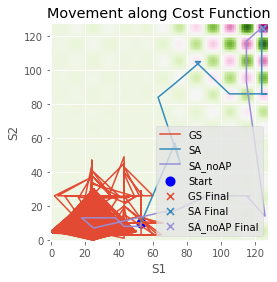

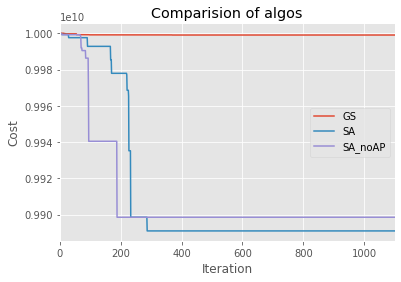

In [6]:
### Plotting for 1 simulation
plt.rcParams["image.origin"] = 'lower'
plt.imshow(S_cost, cmap='PiYG')
plt.plot(GS_curS[:,0], GS_curS[:,1], label='GS')
plt.plot(SA_curS[:,0], SA_curS[:,1], label='SA')
plt.plot(SA_curS_noAP[:,0], SA_curS_noAP[:,1], label='SA_noAP')

plt.scatter([S0[0]], [S0[1]], s=50, c='b', linewidths=3, label='Start')
plt.scatter([GS_best[0]], [GS_best[1]], s=50, marker='x', linewidths=3, label='GS Final')
plt.scatter([SA_best[0]], [SA_best[1]], s=50, marker='x', linewidths=3, label='SA Final')
plt.scatter([SA_best_noAP[0]], [SA_best_noAP[1]], s=50, marker='x', linewidths=3, label='SA_noAP Final')
pretty_plot(xlabel='S1', ylabel='S2', title='Movement along Cost Function', colorbar=False)

plt.plot(GS_mat[:,0], GS_mat[:,2], label='GS')
plt.plot(SA_mat[:,0], SA_mat[:,2], label='SA')
plt.plot(SA_mat_noAP[:,0], SA_mat_noAP[:,2], label='SA_noAP')
pretty_plot(xlim=(0,maxIter), xlabel='Iteration', ylabel='Cost', title='Comparision of algos')

In [7]:
### Multiple simulations
numSim = 30
Z = np.random.randint(0, limS, size=(numSim, 2))
GS_matV, GS_bestV, GS_curSV = [np.empty((numSim, maxIter, 3)), np.empty((numSim, 2)), np.empty((numSim, maxIter, 2))]
SA_matV, SA_bestV, SA_curSV = [np.empty((numSim, maxIter, 3)), np.empty((numSim, 2)), np.empty((numSim, maxIter, 2))]
SAnoAP_matV, SAnoAP_bestV, SAnoAP_curSV = [np.empty((numSim, maxIter, 3)), np.empty((numSim, 2)), np.empty((numSim, maxIter, 2))]

for i in range(numSim):
    GS_matV[i], GS_bestV[i], GS_curSV[i] = GS(Z[i], maxIter)
    SA_matV[i], SA_bestV[i], SA_curSV[i] = SA(Z[i], T0, alpha, beta, M, maxIter)
    SAnoAP_matV[i], SAnoAP_bestV[i], SAnoAP_curSV[i] = SA(Z[i], T0_noAP, alpha_noAP, beta, M, maxIter)
    

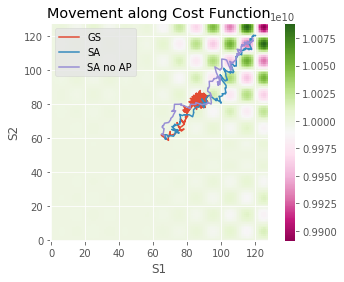

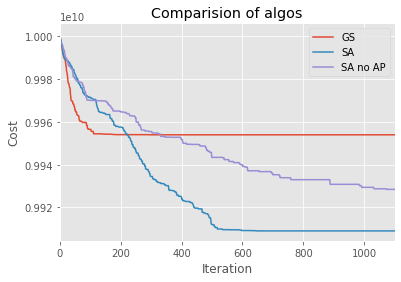

In [8]:
plt.imshow(S_cost, cmap='PiYG')
plt.plot(np.average(GS_curSV[:,:,0], axis=0), np.average(GS_curSV[:,:,1], axis=0), label='GS')
plt.plot(np.average(SA_curSV[:,:,0], axis=0), np.average(SA_curSV[:,:,1], axis=0), label='SA')
plt.plot(np.average(SAnoAP_curSV[:,:,0], axis=0), np.average(SAnoAP_curSV[:,:,1], axis=0), label='SA no AP')
pretty_plot(xlabel='S1', ylabel='S2', title='Movement along Cost Function', colorbar=True)

plt.plot(GS_matV[0,:,0], np.average(GS_matV[:,:,2], axis=0), label='GS')
plt.plot(SA_matV[0,:,0], np.average(SA_matV[:,:,2], axis=0), label='SA')
plt.plot(SAnoAP_matV[0,:,0], np.average(SAnoAP_matV[:,:,2], axis=0), label='SA no AP')
pretty_plot(xlim=(0,maxIter), xlabel='Iteration', ylabel='Cost', title='Comparision of algos')